In [1]:
from pyspark import SparkContext
sc=SparkContext()
from pyspark.sql import SQLContext
sQLContext= SQLContext(sc)

In [2]:
bd = sQLContext.read.format("com.databricks.spark.csv"
).option("header", "true"
).load(r'C:\Users\SONY\Desktop\BigDta\On_Time_On_Time_Performance_2016_12.csv', inferSchema=True
)

In [4]:
bd.columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'UniqueCarrier',
 'AirlineID',
 'Carrier',
 'TailNum',
 'FlightNum',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 

In [5]:
bd=bd.select('Year','Month','DayofMonth','DayOfWeek','CRSDepTime','UniqueCarrier',
             'TailNum', 'ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled', 'Diverted',
             'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay') 

In [6]:
bd.count()

460949

In [7]:
bd.select('DayOfWeek','ArrDelay').groupBy('DayOfWeek').mean().show()

+---------+--------------+------------------+
|DayOfWeek|avg(DayOfWeek)|     avg(ArrDelay)|
+---------+--------------+------------------+
|        1|           1.0|10.820977995110024|
|        6|           6.0|12.179739883419252|
|        3|           3.0|3.5464597100225683|
|        5|           5.0| 8.236093576894339|
|        4|           4.0| 7.554505599053753|
|        7|           7.0|15.359424593967518|
|        2|           2.0| 4.266604010025063|
+---------+--------------+------------------+



In [8]:
sQLContext.registerDataFrameAsTable(bd, "bd")

In [10]:
sQLContext.sql('select Origin,avg(ArrDelay) as perro,count(*) from bd group by Origin order by perro desc').show()

+------+------------------+--------+
|Origin|             perro|count(1)|
+------+------------------+--------+
|   PPG| 262.6363636363636|      11|
|   MMH| 67.64285714285714|      16|
|   MQT| 55.34615384615385|      56|
|   JAC| 54.92434210526316|     309|
|   CIU|38.129629629629626|      56|
|   IDA|  35.5414364640884|     189|
|   ABI| 35.22222222222222|      27|
|   ITH| 33.32911392405063|      83|
|   ISN| 32.41772151898734|      85|
|   ASE|  32.0501002004008|     562|
|   BGM| 31.29090909090909|      56|
|   SUN| 31.20253164556962|     120|
|   GUC|31.055555555555557|      39|
|   BRO|30.986486486486488|      79|
|   GFK|28.894736842105264|     160|
|   TWF|28.610169491525422|     122|
|   SPI|27.794642857142858|     123|
|   GGG|  27.6046511627907|      45|
|   LAW|26.949579831932773|     122|
|   BJI|             25.75|      61|
+------+------------------+--------+
only showing top 20 rows



In [10]:
bd2=sQLContext.sql("select * from bd where Origin in ('ATL','ORD','DEN','LAX','DFW','SFO','PHX','LAS') and \
Dest in ('ATL','ORD','DEN','LAX','DFW','SFO','PHX','LAS') ")

In [13]:
bd2.count()

30965

In [14]:
bd2.select('Origin').distinct().count()

8

In [17]:
bd2.select('Dest').groupBy('Dest').count().show()

+----+-----+
|Dest|count|
+----+-----+
| LAS| 3726|
| DEN| 3967|
| PHX| 3302|
| DFW| 3275|
| SFO| 4430|
| ATL| 3094|
| ORD| 3829|
| LAX| 5342|
+----+-----+



In [22]:
sQLContext.registerDataFrameAsTable(bd2, "bd2")

In [24]:
sQLContext.sql("select Dest as Destino, count(*) N_vuelos, round(100*count(*)/(select count(*) from bd2),2) as Porcentaje \
from bd2 group by Dest").show()

+-------+--------+----------+
|Destino|N_vuelos|Porcentaje|
+-------+--------+----------+
|    LAS|    3726|     12.03|
|    DEN|    3967|     12.81|
|    PHX|    3302|     10.66|
|    DFW|    3275|     10.58|
|    SFO|    4430|     14.31|
|    ATL|    3094|      9.99|
|    ORD|    3829|     12.37|
|    LAX|    5342|     17.25|
+-------+--------+----------+



In [26]:
sQLContext.sql("select count(* ) from bd2").show()

+--------+
|count(1)|
+--------+
|   30965|
+--------+



In [30]:
bd2.collect()

[Row(Year=2016, Month=12, DayofMonth=1, DayOfWeek=4, CRSDepTime=845, UniqueCarrier='AA', TailNum='N8ARAA', ArrDelay=-7.0, DepDelay=-5.0, Origin='LAX', Dest='DFW', Distance=1235.0, Cancelled=0.0, Diverted=0.0, CarrierDelay=None, WeatherDelay=None, NASDelay=None, SecurityDelay=None, LateAircraftDelay=None),
 Row(Year=2016, Month=12, DayofMonth=2, DayOfWeek=5, CRSDepTime=845, UniqueCarrier='AA', TailNum='N8ARAA', ArrDelay=-3.0, DepDelay=5.0, Origin='LAX', Dest='DFW', Distance=1235.0, Cancelled=0.0, Diverted=0.0, CarrierDelay=None, WeatherDelay=None, NASDelay=None, SecurityDelay=None, LateAircraftDelay=None),
 Row(Year=2016, Month=12, DayofMonth=3, DayOfWeek=6, CRSDepTime=845, UniqueCarrier='AA', TailNum='N8ABAA', ArrDelay=-3.0, DepDelay=-3.0, Origin='LAX', Dest='DFW', Distance=1235.0, Cancelled=0.0, Diverted=0.0, CarrierDelay=None, WeatherDelay=None, NASDelay=None, SecurityDelay=None, LateAircraftDelay=None),
 Row(Year=2016, Month=12, DayofMonth=4, DayOfWeek=7, CRSDepTime=845, UniqueCarri

In [29]:
bd2.select('ArrDelay').orderBy('ArrDelay',ascending=False).show(10)

+--------+
|ArrDelay|
+--------+
|  2028.0|
|  1505.0|
|  1006.0|
|   996.0|
|   951.0|
|   920.0|
|   920.0|
|   873.0|
|   872.0|
|   868.0|
+--------+
only showing top 10 rows



In [31]:
bd2.select('ArrDelay').sort('ArrDelay').collect()[int(0.95*bd2.select('ArrDelay').count())]

Row(ArrDelay=103.0)

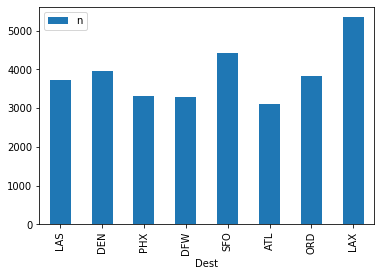

In [36]:
import matplotlib.pyplot as plt
sQLContext.sql('select Dest,count(*) as n from bd2 group by Dest').toPandas().plot(kind='bar',x='Dest',y='n')


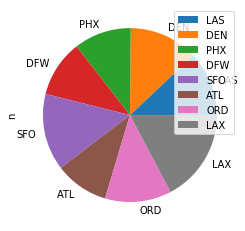

In [47]:
pandas=sQLContext.sql('select Dest,count(*) as n from bd2 group by Dest').toPandas()
pandas.plot.pie(labels=pandas['Dest'],y='n')
plt.legend(loc='best')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DAD6CEAC8>]],
      dtype=object)

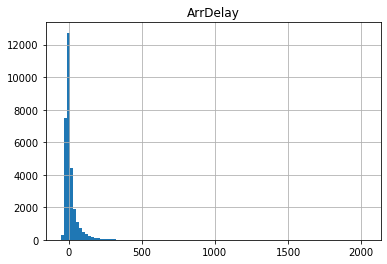

In [49]:
pnadas= bd2.select('ArrDelay').toPandas()
pnadas.hist(bins=100)

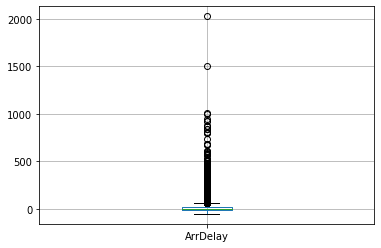

In [50]:
pnadas.boxplot()

In [51]:
bd2.select('ArrDelay').describe().show()

+-------+------------------+
|summary|          ArrDelay|
+-------+------------------+
|  count|             30466|
|   mean|13.300695857677411|
| stddev| 53.50946738163751|
|    min|             -53.0|
|    max|            2028.0|
+-------+------------------+



In [54]:
bd3=bd.filter(bd.Origin.isin('ATL','ORD','DEN','LAX','DFW','SFO','PHX','LAS') & bd.Dest.isin('ATL','ORD','DEN','LAX','DFW','SFO','PHX','LAS'))

In [55]:
sQLContext.registerDataFrameAsTable(bd3,'bd3')

In [56]:
bd3.describe('ArrDelay').show()

+-------+------------------+
|summary|          ArrDelay|
+-------+------------------+
|  count|             30466|
|   mean|13.300695857677411|
| stddev| 53.50946738163751|
|    min|             -53.0|
|    max|            2028.0|
+-------+------------------+



In [57]:
df=bd3.describe().toPandas()

In [61]:
df.set_index('summary').T

summary,count,mean,stddev,min,max
Year,30965,2016.0,0.0,2016,2016
Month,30965,12.0,1.1993456812220341E-15,12,12
DayofMonth,30965,15.943484579363798,8.876012086360873,1,31
DayOfWeek,30965,4.008719522041014,1.925961691515878,1,7
CRSDepTime,30965,1336.3809785241401,507.6969342028549,5,2359
UniqueCarrier,30965,None,None,AA,WN
TailNum,30820,None,None,N001AA,N999DN
ArrDelay,30466,13.300695857677411,53.50946738163751,-53.0,2028.0
DepDelay,30501,17.28562997934494,49.93901250742796,-21.0,2040.0
Origin,30965,None,None,ATL,SFO


In [67]:
bd3=bd3.filter(bd3.Cancelled==0)

In [69]:
bd3=bd3.filter(bd3.Diverted==0)

In [70]:
bd3.count()

30466

In [72]:
bd3.filter(bd3.ArrDelay<0).select('ArrDelay','CarrierDelay','WeatherDelay','SecurityDelay','LateAircraftDelay').show()

+--------+------------+------------+-------------+-----------------+
|ArrDelay|CarrierDelay|WeatherDelay|SecurityDelay|LateAircraftDelay|
+--------+------------+------------+-------------+-----------------+
|    -7.0|        null|        null|         null|             null|
|    -3.0|        null|        null|         null|             null|
|    -3.0|        null|        null|         null|             null|
|    -2.0|        null|        null|         null|             null|
|    -2.0|        null|        null|         null|             null|
|    -6.0|        null|        null|         null|             null|
|    -9.0|        null|        null|         null|             null|
|    -2.0|        null|        null|         null|             null|
|   -16.0|        null|        null|         null|             null|
|   -21.0|        null|        null|         null|             null|
|   -16.0|        null|        null|         null|             null|
|   -11.0|        null|        nul

In [73]:
bd3.filter(bd3.ArrDelay<0).select('ArrDelay','CarrierDelay','WeatherDelay','SecurityDelay','LateAircraftDelay').count()

15780

In [74]:
bd3=bd3.na.fill({'CarrierDelay':0,'WeatherDelay':0,'SecurityDelay':0,'LateAircraftDelay':0})

In [75]:
bd3=bd3.na.fill({'NASDelay':0})

In [77]:
bd3.describe().toPandas().T[0]

summary              count
Year                 30466
Month                30466
DayofMonth           30466
DayOfWeek            30466
CRSDepTime           30466
UniqueCarrier        30466
TailNum              30466
ArrDelay             30466
DepDelay             30466
Origin               30466
Dest                 30466
Distance             30466
Cancelled            30466
Diverted             30466
CarrierDelay         30466
WeatherDelay         30466
NASDelay             30466
SecurityDelay        30466
LateAircraftDelay    30466
Name: 0, dtype: object

In [78]:
bd2.count()

30965

In [82]:
bd2.select('SecurityDelay').toPandas().count()

SecurityDelay    8401
dtype: int64